In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import os
import sys

parent = os.path.dirname(os.getcwd())  # workaround to import from utils/
sys.path.append(parent)

from utils.db_utils import df_from_snowflake
pd.option_context('display.max_rows', None,)

In [11]:
sf_query = """
select *,
        CLICK_ID_TIMESTAMP::DATE as DATE,
        (actual_offsite_booking_rev - lag(estimated_offsite_booking_rev, 1)
                over(
                    partition by provider_id, site_id, device_type, app_id 
                    order by click_id_timestamp asc
                )
            )                                                                          as estimattion_diff_v2,
            estimattion_diff_v2 / actual_offsite_booking_rev::float(6)                    as percent_diff_v2,
            iff(percent_diff_v2<=0.2,'good','bad')                                      as est_power,
            iff(percent_diff_v2<=0.1,'good','bad')                                      as est_power_strict
from stage.derived_marketing.dim_estimated_app_offsite_booking
"""

In [12]:
df = df_from_snowflake(sf_query)
df

,CLICK_ID_TIMESTAMP,CLICK_ID,PROVIDER_ID,SITE_ID,DEVICE_TYPE,APP_ID,ACTUAL_OFFSITE_BOOKING_REV,ESTIMATED_OFFSITE_BOOKING_REV,ESTIMATION_STANDARD_DEVIATION,ESTIMATION_LOWER_BOUND,ESTIMATION_UPPER_BOUND,ESTIMATTION_DIFF,PERCENT_DIFF,DATE,ESTIMATTION_DIFF_V2,PERCENT_DIFF_V2,EST_POWER,EST_POWER_STRICT
0,2024-02-13 21:05:28.697,3QZ0LDJ7PF8G2HW0,tripAdvisor,hometogo.be,Tablet,app_mobile_ios,49.447900,49.447900,0.000000,49.447900,49.447900,0.970520,0.019627,2024-02-13,NaN,NaN,bad,bad
1,2024-01-09 06:46:26.366,01J54I68S0Y192K4,agoda,hometogo.ch,Mobile,app_mobile_ios,0.021914,0.085173,0.194690,-0.296419,0.466765,-0.062041,-2.831079,2024-01-09,NaN,NaN,bad,bad
2,2024-01-09 11:47:39.983,I72EYICSN8S74F4Q,agoda,hometogo.ch,Mobile,app_mobile_ios,0.021914,0.086391,0.194198,-0.294237,0.467019,-0.063259,-2.886634,2024-01-09,-0.063259,-2.886634,good,good
3,2024-01-09 17:41:05.737,59JBEH0R4IVW0UE1,agoda,hometogo.ch,Mobile,app_mobile_ios,0.021914,0.087608,0.193696,-0.292036,0.467253,-0.064476,-2.942190,2024-01-09,-0.064476,-2.942190,good,good
4,2024-01-09 19:17:55.581,F8170KY22Y251E46,agoda,hometogo.ch,Mobile,app_mobile_ios,0.021914,0.088217,0.193450,-0.290945,0.467379,-0.065694,-2.997745,2024-01-09,-0.065694,-2.997745,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101986,2024-03-08 07:49:01.057,X0EIN9N65O2TJ32W,smarterTravels,lardeferias.com.br,Mobile,app_mobile_ios,0.803970,1.078156,0.533072,0.033336,2.122977,0.519337,0.645966,2024-03-08,-0.192100,-0.238939,good,good
101987,2024-03-12 12:30:25.004,2F057M684Z6FT423,smarterTravels,lardeferias.com.br,Mobile,app_mobile_ios,0.576070,1.055245,0.552322,-0.027306,2.137796,0.252359,0.438070,2024-03-12,-0.502086,-0.871572,good,good
101988,2024-03-17 21:54:20.454,GK1166O8O40R9YF4,smarterTravels,lardeferias.com.br,Mobile,app_mobile_ios,0.128550,0.834865,0.521833,-0.187928,1.857658,-0.108301,-0.842483,2024-03-17,-0.926695,-7.208829,good,good
101989,2024-03-17 22:07:50.329,714360E851492WN9,smarterTravels,lardeferias.com.br,Mobile,app_mobile_ios,0.128550,0.658471,0.486876,-0.295806,1.612749,-0.706315,-5.494477,2024-03-17,-0.706315,-5.494477,good,good


In [28]:
agoda = df[(df['PROVIDER_ID']== "agoda") & (df['SITE_ID']=='hometogo.ch')].sort_values(by='CLICK_ID_TIMESTAMP')
agoda

,CLICK_ID_TIMESTAMP,CLICK_ID,PROVIDER_ID,SITE_ID,DEVICE_TYPE,APP_ID,ACTUAL_OFFSITE_BOOKING_REV,ESTIMATED_OFFSITE_BOOKING_REV,ESTIMATION_STANDARD_DEVIATION,ESTIMATION_LOWER_BOUND,ESTIMATION_UPPER_BOUND,ESTIMATTION_DIFF,PERCENT_DIFF,DATE,ESTIMATTION_DIFF_V2,PERCENT_DIFF_V2,EST_POWER,EST_POWER_STRICT
1,2024-01-09 06:46:26.366,01J54I68S0Y192K4,agoda,hometogo.ch,Mobile,app_mobile_ios,0.021914,0.085173,0.194690,-0.296419,0.466765,-6.204143e-02,-2.831079e+00,2024-01-09,NaN,NaN,bad,bad
2,2024-01-09 11:47:39.983,I72EYICSN8S74F4Q,agoda,hometogo.ch,Mobile,app_mobile_ios,0.021914,0.086391,0.194198,-0.294237,0.467019,-6.325890e-02,-2.886634e+00,2024-01-09,-6.325890e-02,-2.886634e+00,good,good
3,2024-01-09 17:41:05.737,59JBEH0R4IVW0UE1,agoda,hometogo.ch,Mobile,app_mobile_ios,0.021914,0.087608,0.193696,-0.292036,0.467253,-6.447636e-02,-2.942190e+00,2024-01-09,-6.447636e-02,-2.942190e+00,good,good
4,2024-01-09 19:17:55.581,F8170KY22Y251E46,agoda,hometogo.ch,Mobile,app_mobile_ios,0.021914,0.088217,0.193450,-0.290945,0.467379,-6.569383e-02,-2.997745e+00,2024-01-09,-6.569383e-02,-2.997745e+00,good,good
28752,2024-01-10 06:43:36.540,QUIIHL1B79J43C1M,agoda,hometogo.ch,Mobile,app_mobile_android,0.048685,0.020391,0.011559,-0.002264,0.043046,-3.953201e-02,-8.119962e-01,2024-01-10,NaN,NaN,bad,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2024-04-02 21:45:16.988,3OWAA5822YI1X9DD,agoda,hometogo.ch,Mobile,app_mobile_ios,0.005537,0.005537,0.000000,0.005537,0.005537,0.000000e+00,0.000000e+00,2024-04-02,0.000000e+00,0.000000e+00,good,good
216,2024-04-02 21:46:03.243,5483N0A3DLC5E982,agoda,hometogo.ch,Mobile,app_mobile_ios,0.005537,0.005537,0.000000,0.005537,0.005537,0.000000e+00,0.000000e+00,2024-04-02,0.000000e+00,0.000000e+00,good,good
217,2024-04-02 22:31:00.227,N52E7Z8OH479P7BN,agoda,hometogo.ch,Mobile,app_mobile_ios,0.005537,0.005537,0.000000,0.005537,0.005537,-8.673617e-19,-1.566483e-16,2024-04-02,-8.673617e-19,-1.566483e-16,good,good
218,2024-04-02 22:44:35.447,IV72928O2X6O4W21,agoda,hometogo.ch,Mobile,app_mobile_ios,0.005537,0.005537,0.000000,0.005537,0.005537,-8.673617e-19,-1.566483e-16,2024-04-02,-8.673617e-19,-1.566483e-16,good,good


<Axes: title={'center': 'predict_performance'}, ylabel='CLICK_ID'>

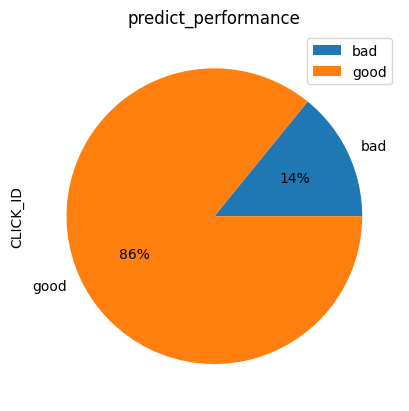

In [14]:
df.groupby(['EST_POWER_STRICT']).count().plot(kind='pie', y='CLICK_ID', autopct='%1.0f%%', title='predict_performance')

In [15]:
chart = df[['DATE','CLICK_ID','EST_POWER_STRICT']]
chart=chart.groupby(['DATE','EST_POWER_STRICT'])['CLICK_ID'].count().reset_index()

chart['total']=chart['CLICK_ID']/chart.groupby('DATE')['CLICK_ID'].transform('sum')
chart
#chart=chart.pivot(index='DATE',columns='EST_POWER',values='CLICK_ID')

#chart.plot(legend=True)

,DATE,EST_POWER_STRICT,CLICK_ID,total
0,2024-01-09,bad,232,0.256354
1,2024-01-09,good,673,0.743646
2,2024-01-10,bad,227,0.248087
3,2024-01-10,good,688,0.751913
4,2024-01-11,bad,171,0.194761
...,...,...,...,...
173,2024-04-04,good,1594,0.972544
174,2024-04-05,bad,35,0.454545
175,2024-04-05,good,42,0.545455
176,2024-04-06,bad,8,0.421053


<Axes: xlabel='DATE', ylabel='%'>

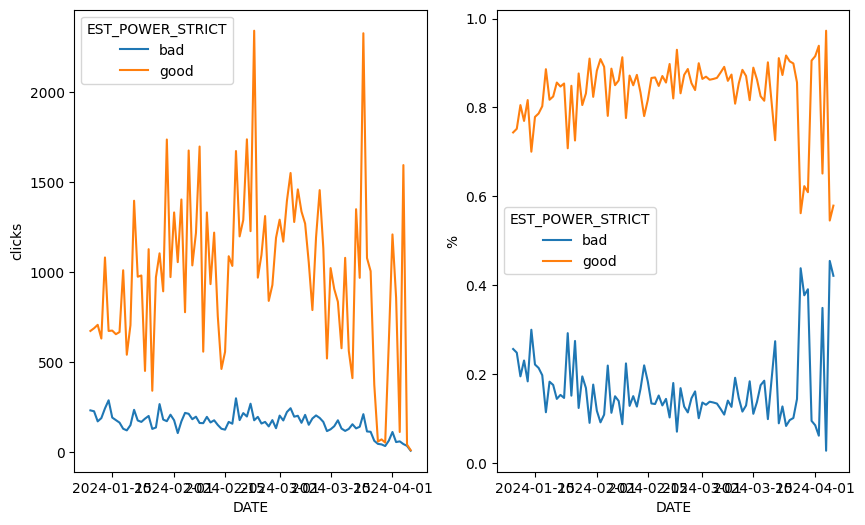

In [24]:
_, ax = pp.subplots(nrows=1, ncols=2, sharex='col', figsize=(10, 6))
(chart.pivot(index='DATE',columns='EST_POWER_STRICT',values='CLICK_ID')).plot(kind='line' ,ylabel='clicks', ax = ax[0])
(chart.pivot(index='DATE',columns='EST_POWER_STRICT',values='total')).plot(kind='line' ,ylabel='%', ax = ax[1])

In [25]:
df['ESTIMATTION_DIFF_V2'].sum()

-8275.55099424388

In [26]:
df['ACTUAL_OFFSITE_BOOKING_REV'].sum()

466865.3564280336